In [26]:
import pandas as pd
import numpy as np
import sklearn

In [27]:
new_unified_person_df = pd.read_parquet('tables/new_unified_person_df_final.parquet')

In [ ]:
new_unified_person_df

In [28]:
import numpy as np
from sentence_transformers import SentenceTransformer,util

model = SentenceTransformer('all-MiniLM-L6-v2')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


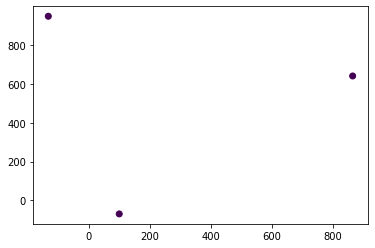

In [37]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn import metrics
import matplotlib.pyplot as plt

temp_descp_list = new_unified_person_df['description_list'].iloc[21]
descp_embeddings = model.encode(temp_descp_list)

dim_reducer = TSNE()
reduced_emb = dim_reducer.fit_transform(descp_embeddings)

clusterer = DBSCAN(eps=0.5, min_samples=3)
clusterer.fit(reduced_emb)
labels = clusterer.labels_

plt.scatter(reduced_emb[:,0],reduced_emb[:,1],c=labels)

In [38]:
cos_sim = util.cos_sim(descp_embeddings, descp_embeddings)

clusterer = DBSCAN(eps=0.5, min_samples=3)
clusterer.fit(cos_sim)
labels = clusterer.labels_

In [39]:
pd.set_option('display.max_colwidth', None)
pd.DataFrame.from_dict({'description':temp_descp_list,'cluster':labels}).sort_values('cluster')

,description,cluster
0,"British Prime Minister from 1940 until 1945, and again from 1951 until April 1955",0
1,"former British Prime Minister (1940–1945, 1951–1955)",0
2,British Prime Minister from May 1940 until July 1945 and from October 1951 until April 1955,0


In [49]:
new_unified_person_df['description_list'].iloc[0]

array(['USA, Commander of the United States Military Assistance Command, Vietnam',
       'General, USA, Commander, United States Military Assistance Command, Vietnam',
       'Major General, USA, Commander of the United States Military Assistance Command, Vietnam',
       'General, USA, Army Chief of Staff until September 4, 1974',
       'General, USA; Commander, United States Military Assistance Command, Vietnam (MACV) from July 3, 1968, until June 28, 1972; Army Chief of Staff from October 12, 1972, until September 4, 1974',
       'General, USA; Chief of Staff until September 4, 1974',
       'General, USA, Commander, United States Military Assistance Command, Vietnam until June 28, 1972; Chief of Staff, USA, from October 12',
       'General, USA, Commander, United States Military Assistance Command, Vietnam until June 28, 1972; Chief of Staff, USA, from October 12',
       'General, USA; Commander, Military Assistance Command Vietnam until June 28, 1972; Chief of Staff, U.S. Arm

In [ ]:
role_df = pd.read_parquet('tables/person_role_69_76.parquet')

In [47]:
role_df

,name_set,info_name,info_tag,start_year,end_year
0,Abrams Creighton General Major W.,Vice Chief of Staff of the United States Army,http://www.wikidata.org/entity/Q1355859,1964-01-01T00:00:00Z,1967-01-01T00:00:00Z
0,Abrams Creighton General Major W.,Chief of Staff of the United States Army,http://www.wikidata.org/entity/Q783785,1972-10-12T00:00:00Z,1974-09-04T00:00:00Z
0,Agnew Spiro T.,Vice President of the United States,http://www.wikidata.org/entity/Q11699,1969-01-20T00:00:00Z,1973-10-10T00:00:00Z
0,Agnew Spiro T.,Governor of Maryland,http://www.wikidata.org/entity/Q693032,1967-01-25T00:00:00Z,1969-01-07T00:00:00Z
0,Agnew Spiro T.,"Executive of Baltimore County, Maryland",http://www.wikidata.org/entity/Q4852842,1962-01-01T00:00:00Z,1966-01-01T00:00:00Z
...,...,...,...,...,...
0,H. Johannes Witteveen,Managing Director of the International Monetary Fund,http://www.wikidata.org/entity/Q20054152,1973-09-01T00:00:00Z,1978-06-16T00:00:00Z
0,Clayton Yeutter,Counselor to the President,http://www.wikidata.org/entity/Q732029,1992-02-01T00:00:00Z,1993-01-20T00:00:00Z
0,Clayton Yeutter,United States Secretary of Agriculture,http://www.wikidata.org/entity/Q1029955,1989-02-16T00:00:00Z,1991-03-01T00:00:00Z
0,Farouk I,list of monarchs of the Muhammad Ali Dynasty,http://www.wikidata.org/entity/Q3265575,1936-04-28T00:00:00Z,1952-07-26T00:00:00Z
